In [2]:
import pandas as pd

# Lendo os arquivos
jogos = pd.read_csv('../dados/campeonato-brasileiro-full.csv')
gols = pd.read_csv('../dados/campeonato-brasileiro-gols.csv')
estatisticas = pd.read_csv('../dados/campeonato-brasileiro-estatisticas-full.csv')
cartoes = pd.read_csv('../dados/campeonato-brasileiro-cartoes.csv')

# Visualizando as primeiras linhas de cada dataset
jogos.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [3]:
jogos.columns

Index(['ID', 'rodata', 'data', 'hora', 'mandante', 'visitante',
       'formacao_mandante', 'formacao_visitante', 'tecnico_mandante',
       'tecnico_visitante', 'vencedor', 'arena', 'mandante_Placar',
       'visitante_Placar', 'mandante_Estado', 'visitante_Estado'],
      dtype='object')

In [5]:
jogos.columns.tolist()

['ID',
 'rodata',
 'data',
 'hora',
 'mandante',
 'visitante',
 'formacao_mandante',
 'formacao_visitante',
 'tecnico_mandante',
 'tecnico_visitante',
 'vencedor',
 'arena',
 'mandante_Placar',
 'visitante_Placar',
 'mandante_Estado',
 'visitante_Estado']

In [7]:
jogos['data'] = pd.to_datetime(jogos['data'], errors='coerce', dayfirst=True)

In [8]:
# Filtrar jogos do ano desejado
jogos_2022 = jogos[jogos['ano'] == 2022].copy()

# Criar DataFrames auxiliares: mandantes e visitantes
mandantes = jogos_2022[['mandante', 'mandante_Placar', 'visitante_Placar']].copy()
mandantes.columns = ['time', 'gols_pro', 'gols_contra']

visitantes = jogos_2022[['visitante', 'visitante_Placar', 'mandante_Placar']].copy()
visitantes.columns = ['time', 'gols_pro', 'gols_contra']

# Unir os dois DataFrames (mandantes + visitantes)
resultados = pd.concat([mandantes, visitantes])

# Calcular saldo de gols e pontos
resultados['saldo'] = resultados['gols_pro'] - resultados['gols_contra']
resultados['vitoria'] = resultados['gols_pro'] > resultados['gols_contra']
resultados['empate'] = resultados['gols_pro'] == resultados['gols_contra']
resultados['derrota'] = resultados['gols_pro'] < resultados['gols_contra']
resultados['pontos'] = resultados['vitoria'] * 3 + resultados['empate'] * 1

# Agrupar por time
classificacao = resultados.groupby('time').agg({
    'pontos': 'sum',
    'vitoria': 'sum',
    'empate': 'sum',
    'derrota': 'sum',
    'gols_pro': 'sum',
    'gols_contra': 'sum',
    'saldo': 'sum'
}).sort_values(by=['pontos', 'saldo'], ascending=False)

# Mostrar a tabela
classificacao.reset_index().head(10)


,time,pontos,vitoria,empate,derrota,gols_pro,gols_contra,saldo
0,Palmeiras,81,23,12,3,66,27,39
1,Internacional,73,20,13,5,58,31,27
2,Fluminense,70,21,7,10,63,41,22
3,Corinthians,65,18,11,9,44,36,8
4,Flamengo,62,18,8,12,60,39,21
5,Atletico-MG,58,15,13,10,45,37,8
6,Athletico-PR,58,16,10,12,48,48,0
7,Fortaleza,55,15,10,13,46,39,7
8,Sao Paulo,54,13,15,10,55,42,13
9,America-MG,53,15,8,15,40,40,0


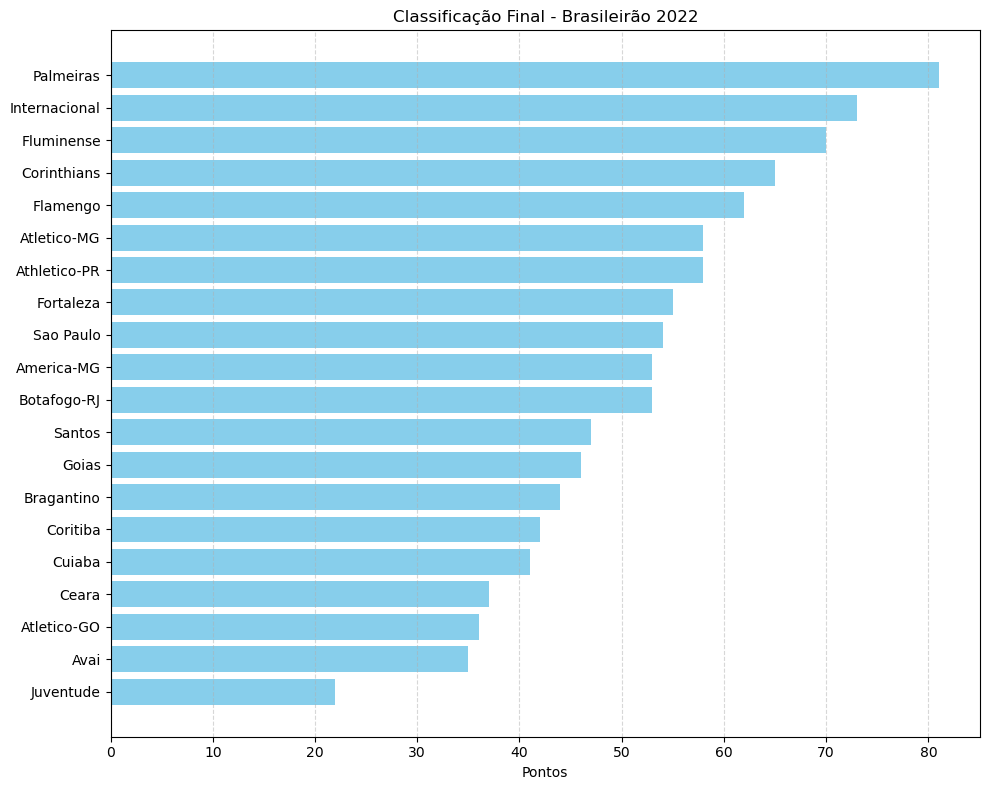

In [9]:
import matplotlib.pyplot as plt

# Ordenar para o gráfico
classificacao_plot = classificacao.reset_index().sort_values(by='pontos', ascending=True)

# Criar o gráfico
plt.figure(figsize=(10, 8))
plt.barh(classificacao_plot['time'], classificacao_plot['pontos'], color='skyblue')
plt.xlabel('Pontos')
plt.title('Classificação Final - Brasileirão 2022')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


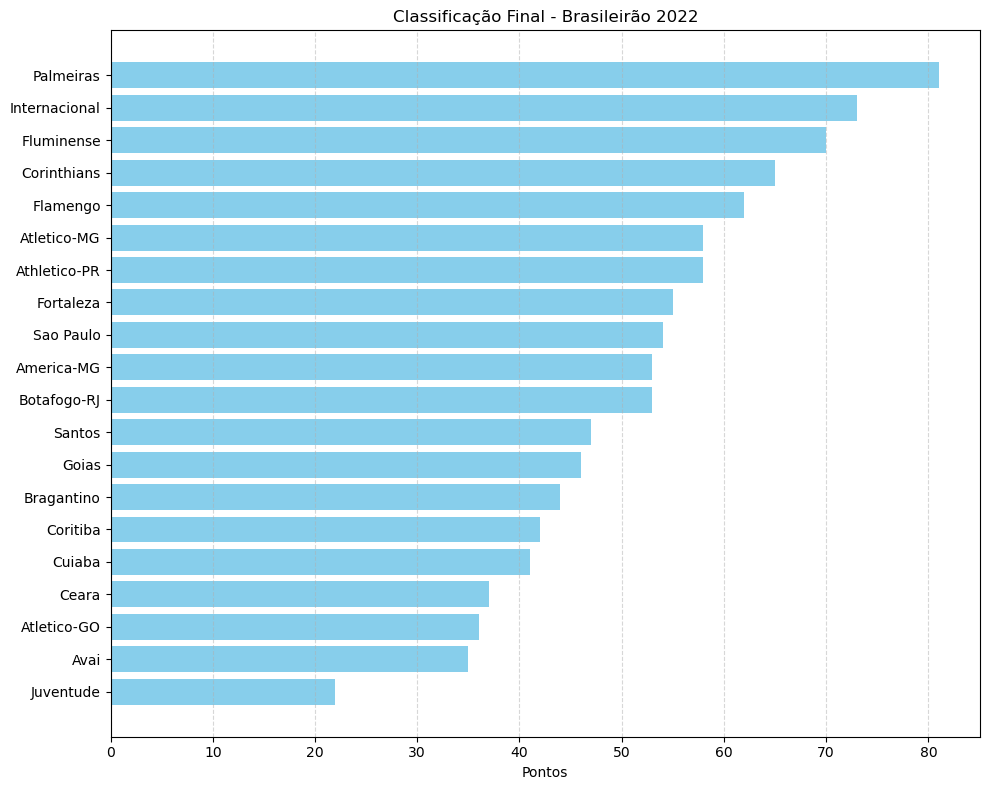

In [10]:
plt.figure(figsize=(10, 8))
plt.barh(classificacao_plot['time'], classificacao_plot['pontos'], color='skyblue')
plt.xlabel('Pontos')
plt.title('Classificação Final - Brasileirão 2022')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Salvar o gráfico
plt.savefig('../imagens/classificacao_brasileirao_2022.png')
plt.show()

In [12]:
jogos['rodata'].unique()

array([ 1,  2,  4,  3, 12,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], dtype=int64)

In [16]:
# Garantir que a coluna é string
jogos['rodata'] = jogos['rodata'].astype(str)

In [17]:
# Extrair o número da rodada
jogos['rodada'] = jogos['rodata'].str.extract(r'(\d+)').astype(float)


In [18]:
jogos['rodada'].unique()

array([ 1.,  2.,  4.,  3., 12.,  5.,  6.,  7.,  8.,  9., 10., 11., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46.])

In [23]:
# Selecionar colunas essenciais
df = jogos[['rodada', 'mandante', 'visitante', 'mandante_Placar', 'visitante_Placar']].copy()

# Função para gerar pontuação por partida
def pontos_por_partida(row):
    if row['mandante_Placar'] > row['visitante_Placar']:
        return pd.Series({row['mandante']: 3, row['visitante']: 0})
    elif row['mandante_Placar'] < row['visitante_Placar']:
        return pd.Series({row['mandante']: 0, row['visitante']: 3})
    else:
        return pd.Series({row['mandante']: 1, row['visitante']: 1})

# Aplicar pontuação
pontuacao_por_rodada = []
for _, row in df.iterrows():
    rodada = row['rodada']
    pontos = pontos_por_partida(row)
    pontos['rodada'] = rodada
    pontuacao_por_rodada.append(pontos)

# DataFrame com a pontuação de cada time por rodada
pontuacao_df = pd.DataFrame(pontuacao_por_rodada).fillna(0)

# Agrupar e acumular pontos
evolucao = pontuacao_df.groupby('rodada').sum().cumsum().T


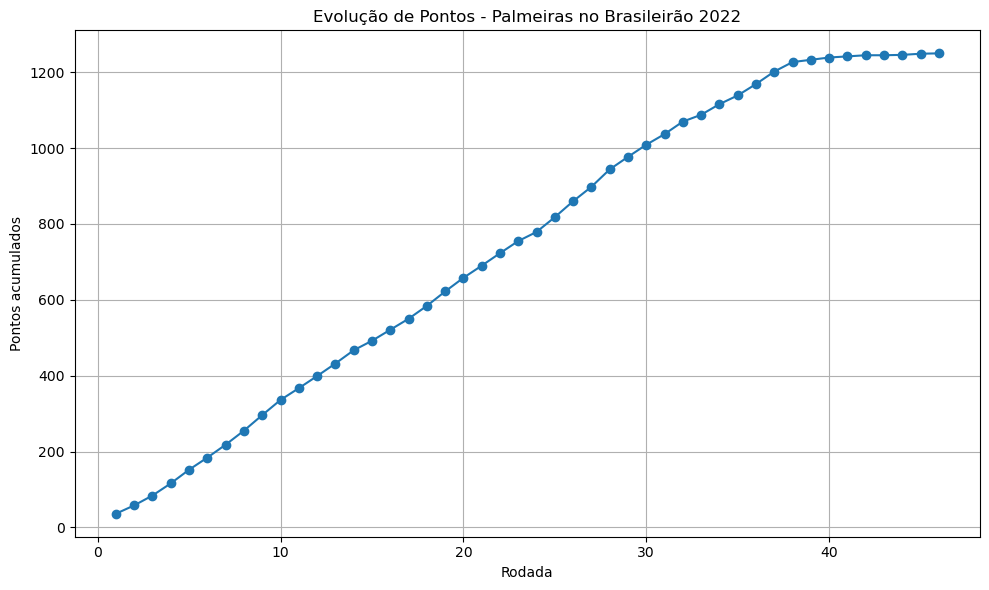

In [22]:
# Exibir evolução de um time específico
import matplotlib.pyplot as plt

time_exemplo = 'Palmeiras'

plt.figure(figsize=(10, 6))
plt.plot(evolucao.columns, evolucao.loc[time_exemplo], marker='o')
plt.title(f'Evolução de Pontos - {time_exemplo} no Brasileirão 2022')
plt.xlabel('Rodada')
plt.ylabel('Pontos acumulados')
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
gols.columns.tolist()

['partida_id', 'rodata', 'clube', 'atleta', 'minuto', 'tipo_de_gol']

In [27]:
gols.columns.tolist()



['partida_id', 'rodata', 'clube', 'atleta', 'minuto', 'tipo_de_gol']

In [29]:
# 1. Fazer o merge usando a coluna correta
gols = gols.merge(
    jogos[['ID', 'ano']], 
    left_on='partida_id', 
    right_on='ID', 
    how='left'
)

# 2. Filtrar somente gols de 2022 (ou ano que você escolher)
gols_2022 = gols[gols['ano'] == 2022]

# 3. Agrupar por atleta (jogador) e clube (time) e contar gols
artilheiros = (
    gols_2022
    .groupby(['atleta', 'clube'], as_index=False)
    .size()
    .rename(columns={'size': 'gols'})
    .sort_values('gols', ascending=False)
)

# 4. Mostrar os top 10
print(artilheiros.head(10))


                             atleta         clube  gols
105                     Germán Cano    Fluminense    26
250                      Pedro Raúl         Goias    19
144                Jonathan Calleri     Sao Paulo    18
32                          Bissoli          Avai    14
201  Marcos Leonardo Santos Almeida        Santos    13
270                            Rony     Palmeiras    12
123                            Hulk   Atletico-MG    12
58                     David Terans  Athletico-PR    12
248                           Pedro      Flamengo    11
168                    Luan Cândido    Bragantino    11


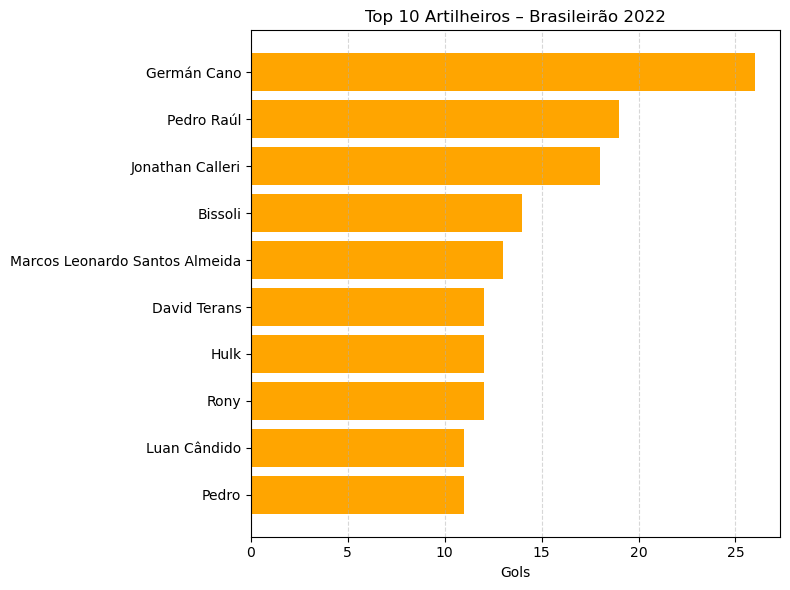

In [30]:
import matplotlib.pyplot as plt

top10 = artilheiros.head(10).sort_values('gols', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(top10['atleta'], top10['gols'], color='orange')
plt.xlabel('Gols')
plt.title('Top 10 Artilheiros – Brasileirão 2022')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Salvar a imagem
plt.savefig('../imagens/top10_artilheiros_2022.png')
plt.show()
